# Lecture 5 Prepepration 






In [4]:
using Plots, StatsBase, DifferentialEquations 

function lorenz63!(du,u,p,t)
    X,Y,Z = u 
    σ,r,b = p 

    du[1] = -σ * X + σ * Y
    du[2] = - X*Z + r*X - Y 
    du[3] = X*Y - b*Z
end 

σ, r, b = 10., 28., 8/3.
p = [σ, r, b]
u0 = rand(3)

prob = ODEProblem(lorenz63!, u0, (0.,100.), p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 3-element Vector{Float64}:
 0.899570035092444
 0.010336087549428385
 0.9081163799823008

In [10]:
soli = solve(remake(prob, p=[10., 0.5, 8/3.], tspan=(0.,10.)))

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 44-element Vector{Float64}:
  0.0
  0.03157191957080886
  0.06773383948683653
  0.10981772438743852
  0.1602505341655051
  0.2159520761615928
  0.2773809966038826
  0.34279640208830836
  0.41146059865662743
  0.4817839099550626
  ⋮
  7.087344464157983
  7.427946658396521
  7.76616988551086
  8.100539986010647
  8.431989292543483
  8.762255515232216
  9.092754132193418
  9.424160908752095
 10.0
u: 44-element Vector{Vector{Float64}}:
 [0.899570035092444, 0.010336087549428385, 0.9081163799823008]
 [0.6573926565327436, 0.0010748552251964043, 0.8349181609375399]
 [0.45718985808947343, -0.004793366581767993, 0.7581267401326418]
 [0.29783419868136357, -0.007958917233614712, 0.6775509036278616]
 [0.1764006132257627, -0.009130870068123893, 0.5921961350270345]
 [0.0971598270216186, -0.00902415158970402, 0.5103913637292061]
 [0.0485796581998736, -0.008381172486

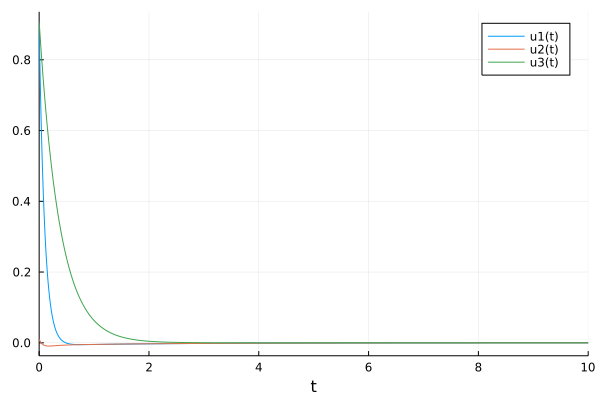

In [11]:
plot(soli)

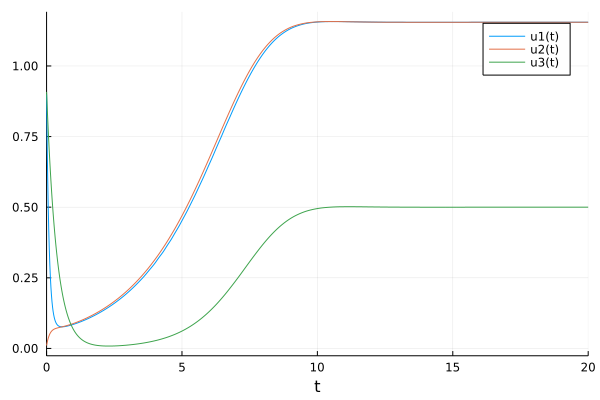

In [15]:
soli = solve(remake(prob, p=[10., 1.5, 8/3.], tspan=(0.,20.)))

plot(soli)

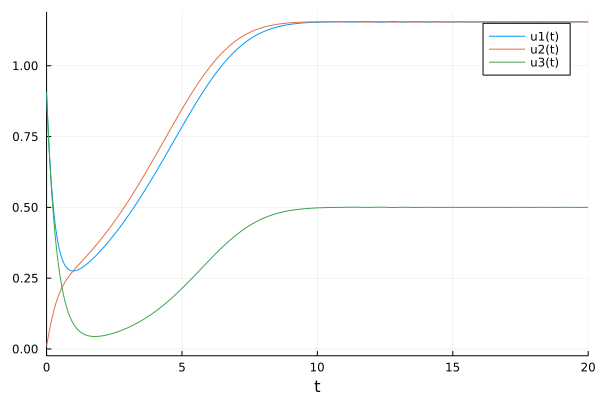

In [18]:
soli = solve(remake(prob, p=[8/3., 1.5, 8/3.], tspan=(0.,20.)))

plot(soli)

In [21]:
σ*(σ+b+3)/(σ-b-1)

24.736842105263154

┌ Info: Saved animation to 
│   fn = /Users/max/Nextcloud/TUMLecture/dyn-modelling/l63.gif
└ @ Plots /Users/max/.julia/packages/Plots/rDbWY/src/animation.jl:114


Plots.AnimatedGif("/Users/max/Nextcloud/TUMLecture/dyn-modelling/l63.gif")
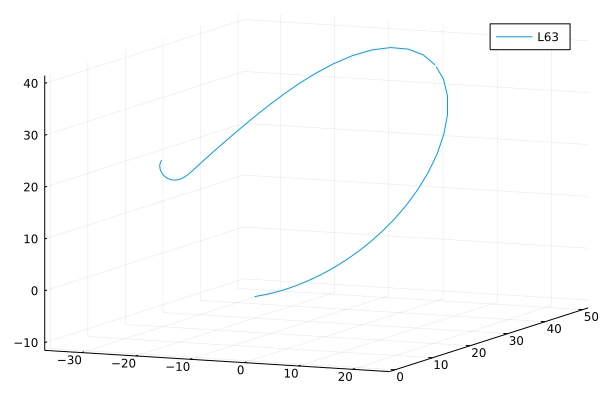

In [49]:
soli = solve(remake(prob,tspan=(0.,250.)))

anim = @animate for i=1:250
    s_i = soli(0:0.01:i)
    plot(s_i[1,:],s_i[2,:],s_i[3,:],xlims=[-35,25],ylims=[0,50],zlims=[-10,40],label="L63")
end 
gif(anim,"l63.gif",fps=5)


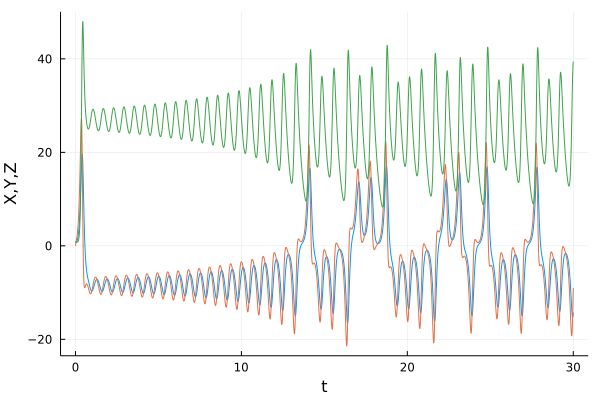

In [57]:
plot(soli(0:0.01:30),xlabel="t",ylabel="X,Y,Z")

┌ Info: Saved animation to 
│   fn = /Users/max/Nextcloud/TUMLecture/dyn-modelling/l63_two.gif
└ @ Plots /Users/max/.julia/packages/Plots/rDbWY/src/animation.jl:114


Plots.AnimatedGif("/Users/max/Nextcloud/TUMLecture/dyn-modelling/l63_two.gif")
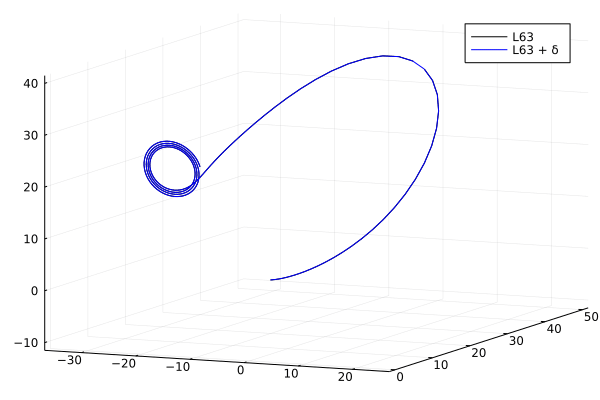

In [62]:
u0 = 5f0*rand(3)
soli_1 = solve(remake(prob,u0=u0, tspan=(0.,250.)))
soli_2 = solve(remake(prob,u0=u0 .+ 0.01, tspan=(0.,250.)))

anim = @animate for i=0:250
    s_1 = soli_1(i:0.01:i+3)
    s_2 = soli_2(i:0.01:i+3)
    plot(s_1[1,:],s_1[2,:],s_1[3,:],xlims=[-35,25],ylims=[0,50],zlims=[-10,40],label="L63",color=:black)
    plot!(s_2[1,:],s_2[2,:],s_2[3,:],xlims=[-35,25],ylims=[0,50],zlims=[-10,40],label="L63 + δ",color=:blue)
end 
gif(anim,"l63_two.gif",fps=5)

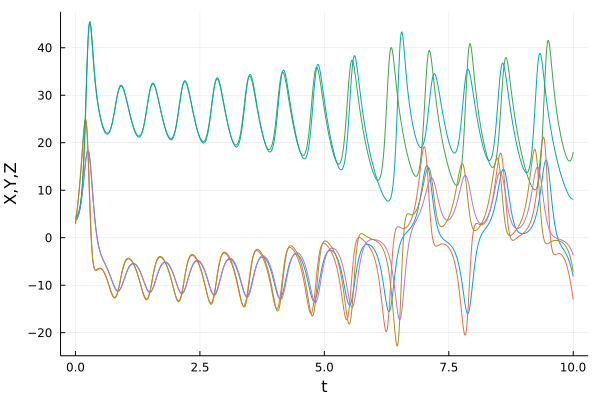

In [73]:
u0 = 5f0*rand(3)
soli_1 = solve(remake(prob,u0=u0, tspan=(0.,250.)))
soli_2 = solve(remake(prob,u0=u0 .+ 0.2, tspan=(0.,250.)))
plot(soli_1(0:0.01:10),xlabel="t",ylabel="X,Y,Z")
plot!(soli_2(0:0.01:10),xlabel="t",ylabel="X,Y,Z")

Nice! We are quite close the the estimate from DynamicalSystems.jl!